24/02/2021 - **Baseline model** - Corentin Garet

# Data loading and cleaning

In [2]:
import pandas as pd
import numpy as np

In [4]:
# Loading data from raw_data
X_train = pd.read_csv('../../raw_data/clean_sentiment_data/X_train_.csv')
y_train = pd.read_csv('../../raw_data/clean_sentiment_data/y_train_.csv')
X_test = pd.read_csv('../../raw_data/clean_sentiment_data/X_test.csv')
y_test = pd.read_csv('../../raw_data/clean_sentiment_data/y_test.csv')

In [5]:
# Transforming y in pd.Series
y_train = y_train['Answer.sentiment']
y_test = y_test['Answer.sentiment']

# Dummy model creation: binary classification

In [27]:
# Creation of y_binary = 0 if negative or 1 if positive
y_train_bin = y_train.apply(lambda x: 0 if x <= 0 else 1)
y_test_bin = y_test.apply(lambda x: 0 if x <= 0 else 1)

In [31]:
# Let's create a dummy model predicting for each observation the most present class in the dataset
positive_percentage_train = y_train_bin.sum() / y_train_bin.shape[0]
round(positive_percentage_train, 2)

0.44

In [35]:
# The most present class is negative. Let's create a prediction with only 0
y_pred_dummy = np.zeros(y_test.shape)

In [42]:
# Computing accuracy of our dummy model
accuracy_dummy = (1 - abs(y_pred_dummy - y_test_bin)).sum() / y_test_bin.shape[0]
print(f'Dummy Accuracy = {round(accuracy_dummy, 2)}')

Dummy Accuracy = 0.55


# Dummy model creation: regression

In [6]:
y_train

0        0.333333
1       -0.333333
2       -2.666667
3       -1.333333
4        2.000000
           ...   
10837    1.000000
10838    2.666667
10839   -0.333333
10840    1.333333
10841   -0.666667
Name: Answer.sentiment, Length: 10842, dtype: float64

<AxesSubplot:xlabel='Answer.sentiment', ylabel='Count'>

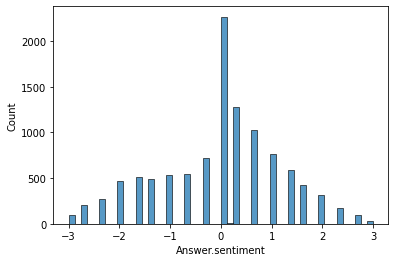

In [7]:
import seaborn as sns
sns.histplot(y_train)

In [8]:
# Let's create a dummy model predicting for each observation the mean of y_train
dummy_pred = y_train.mean()
dummy_pred

-0.025687142593617415

In [9]:
# Create an array with this value
y_pred_dummy_mean = dummy_pred * np.ones(y_test.shape)

In [10]:
y_pred_dummy_mean.shape,  y_test.shape

((2711,), (2711,))

In [11]:
from sklearn.metrics import mean_absolute_error
mae_dummy = mean_absolute_error(y_pred_dummy_mean,  y_test)

In [12]:
print(f'Dummy MAE = {round(mae_dummy, 2)}')

Dummy MAE = 0.94
